# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [ ]:
import numpy as np

class LinearRegression:
  def __init__(self, learning_rate, iter_count):
    self.l = learning_rate
    self.n = iter_count

  def fit(self, X, y):
    n_samples, n_features = X.shape
    X = np.c_[X, np.ones(n_samples)]
    self.wt = np.zeros(n_features + 1)

    # gradient descent
    for _ in range(self.n):
      y_pred = X @ self.wt
      gradient = (X.T @ (y_pred - y)) / n_samples
      self.wt -= self.l * gradient
      #print(self.wt)

  def predict(self, X):
    X = np.c_[X, np.ones(X.shape[0])]
    return X @ self.wt

In [ ]:
X = np.array([[2, 3, 5], [4, 6, 10]])
y = np.array([10, 20])
model = LinearRegression(0.01, 500)
model.fit(X, y)
print(model.predict(np.array([[8, 12, 20]])))

[39.86621487]


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Real estate.csv")
print(df.describe())
print(df.isnull().sum())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

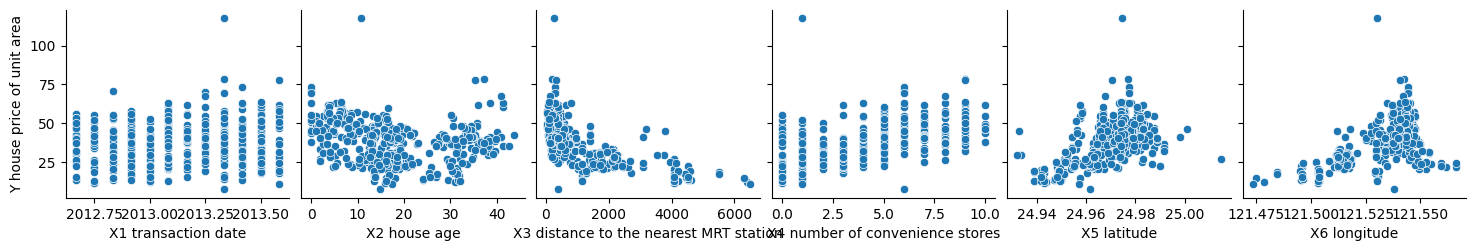

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rows, cols = df.shape
sns.pairplot(
    data=df,
    x_vars=df.columns[1:-1],
    y_vars=[df.columns[-1]]
)

In [ ]:
# removed the first column(useless)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)
model = LinearRegression(0.01, 500)
model.fit(X_train1, y_train)
y_pred_manual = model.predict(X_test1)
print(mean_squared_error(y_test, y_pred_manual))
print(r2_score(y_test, y_pred_manual))

90.58514408903062
0.42891225441226477


In [ ]:
from sklearn.linear_model import LinearRegression as lr
model1 = lr()
model1.fit(X_train1, y_train)
y_pred_sklearn = model1.predict(X_test1)
print(mean_squared_error(y_test, y_pred_sklearn))
print(r2_score(y_test, y_pred_sklearn))

66.67336271835958
0.5796624182861772


In [ ]:
# Initially I used 0.01 and 500 as my hyperparameters
# Trying manually by trial and error, 3369 iterations is almost a perfect match
model = LinearRegression(0.01, 3369)
model.fit(X_train1, y_train)
y_pred_manual = model.predict(X_test1)
print(mean_squared_error(y_test, y_pred_manual))
print(r2_score(y_test, y_pred_manual))

66.67370108907207
0.5796602850515358


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


5. Write code for the sigmoid function and Logistic regression.


In [ ]:
def sigmoid(z):
   return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= dw * self.lr
            self.bias -= db * self.lr

    def predict(self, X):
      #Write the predict function
        y_pred = ((sigmoid(np.dot(X, self.weights) + self.bias)) >= 0.5).astype(int)
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(0.01, 1000)
model.fit(X_train, y_train)
y_pred_manual = model.predict(X_test)
print(accuracy_score(y_test, y_pred_manual))

model1 = lr()
model1.fit(X_train, y_train)
y_pred_sklearn = model1.predict(X_test)
print(accuracy_score(y_test, y_pred_sklearn))


0.9912280701754386
0.9736842105263158


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [ ]:
print(classification_report(y_test, y_pred_manual))
print(confusion_matrix(y_test, y_pred_manual))

print("------------------------------")

print(classification_report(y_test, y_pred_sklearn))
print(confusion_matrix(y_test, y_pred_sklearn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

[[42  1]
 [ 0 71]]
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [ ]:
df = pd.read_csv("/content/glass.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [ ]:
def euclidd(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y_pred = []

    for x in X:
      distances = []
      for i in range(len(self.X)):
        distances.append((euclidd(x, self.X[i]), self.y[i]))

      distances = sorted(distances)[:self.k]
      freq = {}
      maxidx = 0
      maxfreq = 0

      for d in distances:
        if d[1] in freq:
          freq[d[1]] += 1
        else:
          freq[d[1]] = 1

        if freq[d[1]] > maxfreq:
            maxfreq = freq[d[1]]
            maxidx = d[1]

      y_pred.append(maxidx)

    return y_pred

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# given that total is 214, 20 is safe enough
for i in range(1, 21):
  model = KNN(i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("k = ", i, " Accuracy - ", accuracy_score(y_test, y_pred))

k =  1  Accuracy -  0.7674418604651163
k =  2  Accuracy -  0.7674418604651163
k =  3  Accuracy -  0.813953488372093
k =  4  Accuracy -  0.7906976744186046
k =  5  Accuracy -  0.6976744186046512
k =  6  Accuracy -  0.6511627906976745
k =  7  Accuracy -  0.6744186046511628
k =  8  Accuracy -  0.6744186046511628
k =  9  Accuracy -  0.6744186046511628
k =  10  Accuracy -  0.6511627906976745
k =  11  Accuracy -  0.6511627906976745
k =  12  Accuracy -  0.627906976744186
k =  13  Accuracy -  0.6511627906976745
k =  14  Accuracy -  0.6511627906976745
k =  15  Accuracy -  0.6976744186046512
k =  16  Accuracy -  0.6976744186046512
k =  17  Accuracy -  0.7209302325581395
k =  18  Accuracy -  0.7209302325581395
k =  19  Accuracy -  0.7209302325581395
k =  20  Accuracy -  0.7209302325581395


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Observing from above that k = 3 is the best choice
model1 = KNeighborsClassifier(n_neighbors = 3)
model1.fit(X_train, y_train)
y_pred_sklearn = model1.predict(X_test)
print(accuracy_score(y_test, y_pred_sklearn))

0.813953488372093


In [ ]:
#Accuracy exactly as expected, successfully completed